In [1]:
%pylab inline
import numpy as np
import scipy.stats as spstats
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_runs = pd.DataFrame.from_csv("output/2017-07-24-sample_0.csv")
df_values = pd.DataFrame.from_csv("output/2017-07-24-sample_0-values.csv")
rs = sorted(set(df_runs["rewire"]))
strategies = sorted(set(df_values["strategy"]))
trials = sorted(set(df_values["trial"]))
steps = sorted(set(df_values["step"]))

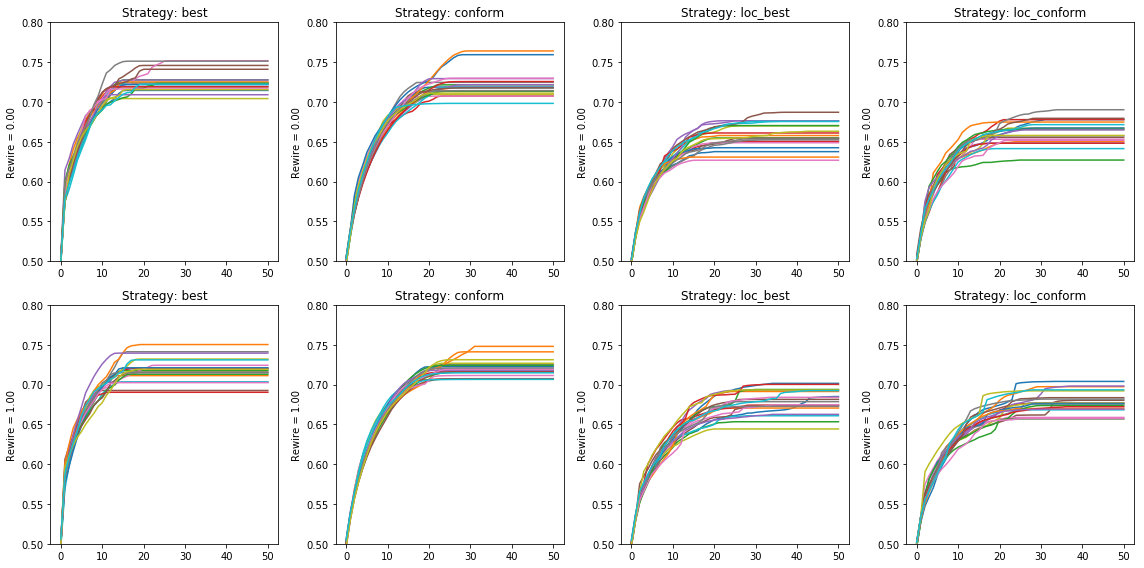

In [6]:
plt.figure(figsize=(16,4*len(rs)))
for i, r in enumerate(rs):
    df_rewire = df_values[df_values["rewire"] == r]
    for j, strategy in enumerate(strategies):
        df_strategy = df_rewire[df_rewire["strategy"] == strategy]
        plt.subplot(len(rs),len(strategies),1+j+i*len(strategies))
        plt.title("Strategy: %s" % strategy)
        plt.ylabel("Rewire = %0.2f" % r)
        for trial_n in trials:
            df_trial = df_strategy[df_strategy["trial"] == trial_n]
            plot(df_trial["step"], df_trial["value"])
            plt.ylim([0.5, 0.8])
plt.tight_layout()

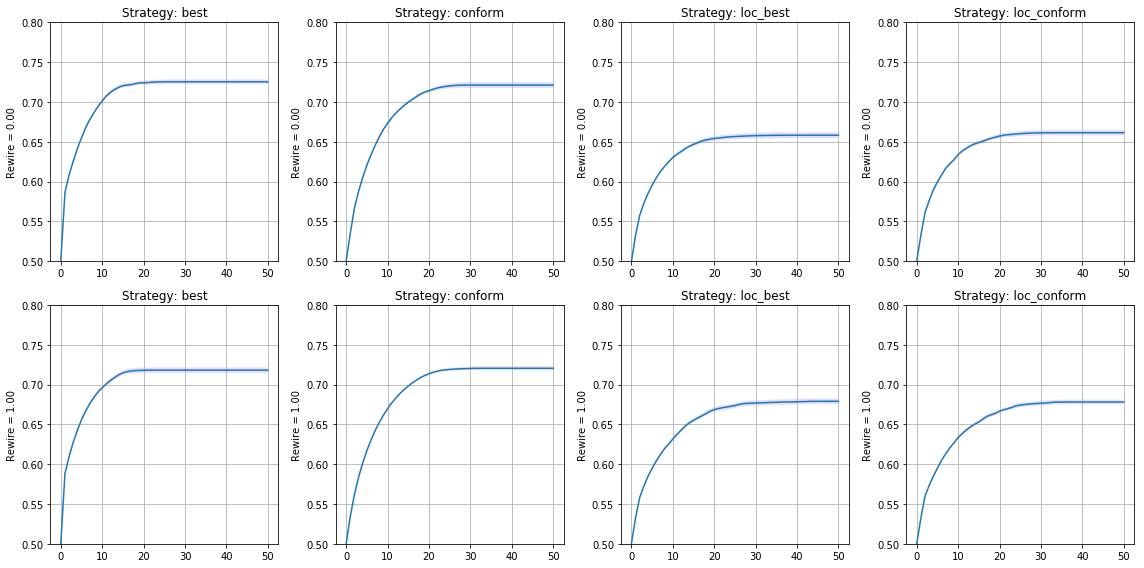

In [11]:
df_grouped = df_values.groupby(["strategy", "rewire", "step"])
plt.figure(figsize=(16,4*len(rs)))
for i, r in enumerate(rs):
    df_rewire = df_values[df_values["rewire"] == r]
    for j, strategy in enumerate(strategies):
        df_strategy = df_rewire[df_rewire["strategy"] == strategy]
        plt.subplot(len(rs),len(strategies),1+j+i*len(strategies))
        plt.title("Strategy: %s" % strategy)
        plt.ylabel("Rewire = %0.2f" % r)
        step_mean = []
        step_se = []
        for step in sorted(set(df_strategy["step"])):
            df = df_strategy[df_strategy["step"] == step]
            step_mean.append(df["value"].mean())
            s = df["value"].std(ddof=1)
            step_se.append(s / sqrt(len(df["value"])))
        mean = np.array(step_mean)
        se = np.array(step_se)
        plt.fill_between(range(len(step_mean)), mean - se, mean + se, facecolor="#dfdfff")
        plt.plot(step_mean)
        plt.grid()
        plt.ylim([0.5, 0.8])
plt.tight_layout()

In [12]:
for i, r in enumerate(rs):
    df_rewire = df_values[df_values["rewire"] == r]
    print "Rewire: %f" % r
    for j, strategy in enumerate(strategies):
        df_strategy = df_rewire[df_rewire["strategy"] == strategy]
        df = df_strategy[df_strategy["step"] == steps[-1]]
        m = df["value"].mean()
        sd = df["value"].std()
        se = sd / sqrt(len(df["value"]))
        print "\t%s:\t%f\t%f" % (strategy, m, se)

Rewire: 0.000000
	best:	0.725401	0.002889
	conform:	0.721237	0.003561
	loc_best:	0.658305	0.003648
	loc_conform:	0.661429	0.003383
Rewire: 1.000000
	best:	0.718163	0.003499
	conform:	0.720482	0.002363
	loc_best:	0.679057	0.003490
	loc_conform:	0.678133	0.003031


In [7]:
for i, r in enumerate(rs):
    df = df_runs[df_runs["rewire"] == r]
    print "Rewire: %f" % r
    m = df["degree"].mean()
    sd = df["degree"].std()
    se = sd / sqrt(len(df["degree"]))
    print "\tDegree:\t%f\t%f" % (m, se)

Rewire: 0.000000
	Degree:	348.940000	0.340495
Rewire: 1.000000
	Degree:	364.074250	0.215736


In [8]:
def values_to_efficiency(values):
    start = values[0]
    halfmax = (max(values) - start) / 2.0 + start
    return 1.0 / float(len([v for v in values if v <= halfmax]))

In [9]:
for i, r in enumerate(rs):
    df_rewire = df_values[df_values["rewire"] == r]
    print "Rewire: %f" % r
    for j, strategy in enumerate(strategies):
        df_strategy = df_rewire[df_rewire["strategy"] == strategy]
        strategy_trials = sorted(set(df_strategy["trial"]))
        efficiencies = np.zeros(len(strategy_trials))
        for i, trial in enumerate(strategy_trials):
            df = df_strategy[df_strategy["trial"] == trial]
            efficiencies[i] = values_to_efficiency(list(df["value"]))
        m = efficiencies.mean()
        sd = efficiencies.std()
        se = sd / sqrt(len(efficiencies))
        print "\t%s:\t%f\t%f" % (strategy, m, se)

Rewire: 0.000000
	best:	0.387500	0.021469
	conform:	0.207976	0.006246
	loc_best:	0.264167	0.016967
	loc_conform:	0.267500	0.011930
Rewire: 1.000000
	best:	0.429167	0.034998
	conform:	0.202500	0.005174
	loc_best:	0.203452	0.008566
	loc_conform:	0.213810	0.011119
